# Filters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

plt.style.use('seaborn-v0_8-whitegrid')

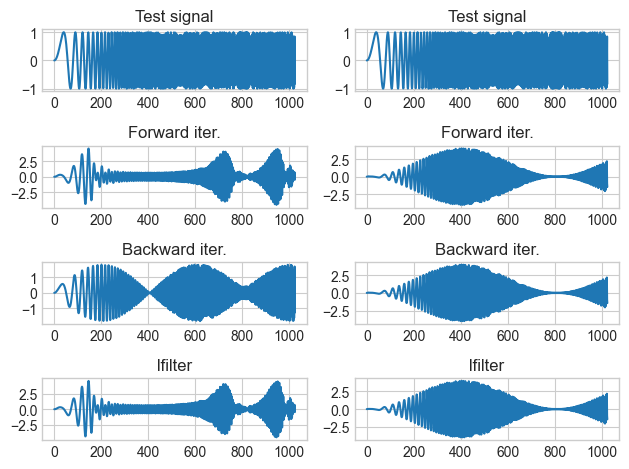

In [2]:
l = 1024
x = np.array(range(l))
w = x/l
y = np.sin(w*x)
d = 4

# Let's caclulate the signals filtered with IIR filter
## First using forward iteration
y11 = y.copy()
for i in range(2*d, l):
    y11[i] = y[i] - y[i-d] + 1.2*y11[i-d] - 0.8*y11[i-2*d]
## Second using backward iteration
y12 = y.copy()
for i in reversed(range(2*d, l)):
    y12[i] = y[i] - y[i-d] + 1.2*y12[i-d] - 0.8*y12[i-2*d]
## Third using lfilter
# was:
#y13 = lfilter([1, 0, 0, 0, 1], [1, 0, 0, 0, -1.2, 0, 0, 0, 0.8], y)
y13 = lfilter([1, 0, 0, 0, -1], [1, 0, 0, 0, -1.2, 0, 0, 0, 0.8], y)

# Let's caclulate the signals filtered with FIR filter
## First using forward iteration
y21 = y.copy()
for i in range(2*d, l):
    y21[i] = y[i] - 2*y[i-d] + y[i-2*d]
## Second using backward iteration
y22 = y.copy()
for i in reversed(range(2*d, l)):
    y22[i] = y[i] - 2*y[i-d] + y[i-2*d]
## Third using lfilter
# was:
#y23 = lfilter([1, 0, 0, 0, 2, 0, 0, 0, -1], [1], y)
y23 = lfilter([1, 0, 0, 0, -2, 0, 0, 0, 1], [1], y)

# Let's start the figure and plot the signal in the top row, then the filtered
# signals below it
fig = plt.figure()
ax1 = plt.subplot(421)
plt.title('Test signal')
plt.plot(x, y)
ax2 = plt.subplot(422)
plt.title('Test signal')
plt.plot(x, y)

# The left column is for the IIR-filtered signals
plt.subplot(423, sharex=ax1)
plt.title('Forward iter.')
plt.plot(x, y11)
plt.subplot(425, sharex=ax1)
plt.title('Backward iter.')
plt.plot(x, y12)
plt.subplot(427, sharex=ax1)
plt.title('lfilter')
plt.plot(x, y13)

# The right column is for the FIR-filtered signals
plt.subplot(424, sharex=ax2)
plt.title('Forward iter.')
plt.plot(x, y21)
plt.subplot(426, sharex=ax2)
plt.title('Backward iter.')
plt.plot(x, y22)
plt.subplot(428, sharex=ax2)
plt.title('lfilter')
plt.plot(x, y23)

plt.tight_layout()
plt.show()
